In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

<h2> data clean-up

In [18]:
df = pd.read_csv('../data/citigo_data.csv',sep=';')
print(len(df))
df.head()

219


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,124.800 kr.,2019,31000,2019-04-17,Benzin,23.8,60,M,5700
1,104.900 kr.,2019,62000,2018-10-02,Benzin,26.2,60,M,5200
2,99.700 kr.,2017,54000,2017-04-11,Benzin,24.4,60,M,8600
3,109.980 kr.,2019,44500,2019-11-07,Benzin,26.2,60,M,8600
4,104.900 kr.,2019,44600,2019-05-14,Benzin,26.2,60,M,8600


In [19]:
#Cleans price and first regestration
non_word = re.compile(r'\D')
df['price'] = df['price'].str.replace(r'\D','')
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

/var/folders/6j/ytdrqb3x76bcbx_6cz_g_l1h0000gn/T/ipykernel_3960/2655036068.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace(r'\D','')


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,124800,2019,31000,2019,Benzin,23.8,60,M,5700
1,104900,2019,62000,2018,Benzin,26.2,60,M,5200
2,99700,2017,54000,2017,Benzin,24.4,60,M,8600
3,109980,2019,44500,2019,Benzin,26.2,60,M,8600
4,104900,2019,44600,2019,Benzin,26.2,60,M,8600
...,...,...,...,...,...,...,...,...,...
214,64900,2014,75000,2014,Benzin,24.4,60,M,7400
215,46000,2017,175000,2017,Benzin,24.4,60,M,4200
216,79800,2018,65000,2017,Benzin,24.4,60,M,5210
217,79900,2016,66000,2016,Benzin,24.4,60,M,7700


In [20]:
#converts categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin
0,124800,2019,31000,2019,23.8,60,5700,0,1,1
1,104900,2019,62000,2018,26.2,60,5200,0,1,1
2,99700,2017,54000,2017,24.4,60,8600,0,1,1
3,109980,2019,44500,2019,26.2,60,8600,0,1,1
4,104900,2019,44600,2019,26.2,60,8600,0,1,1
...,...,...,...,...,...,...,...,...,...,...
214,64900,2014,75000,2014,24.4,60,7400,0,1,1
215,46000,2017,175000,2017,24.4,60,4200,0,1,1
216,79800,2018,65000,2017,24.4,60,5210,0,1,1
217,79900,2016,66000,2016,24.4,60,7700,0,1,1


In [23]:
#selects target and features
X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin']]
y = df['price']

In [24]:
#Test train split of data, 33% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

<h2> Linear Regression model

In [25]:
#fits model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_train,y_train)}')

Regression score: 0.8735328475452615


In [26]:
#Test of 5 cars
print(f'Car 1: Predicted price: {regr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {regr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {regr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {regr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {regr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 83410.42kr - actual price: 89900kr
Car 2: Predicted price: 84736.1kr - actual price: 79900kr
Car 3: Predicted price: 87324.57kr - actual price: 79800kr
Car 4: Predicted price: 80600.27kr - actual price: 79900kr
Car 5: Predicted price: 76143.28kr - actual price: 84900kr


In [27]:
#Method to get prediction score
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [28]:
#Test of prediction score
y_pred = regr.predict(X_test)
get_prediction_score(y_test,y_pred)

89.7223719011594

<h2> Decision tree regressor

In [29]:
#Fit and model score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
#predictions = model.predict(X_test)
dtr.score(X_test, y_test)

0.7981985755611062

In [30]:
#Test of 5 cars
print(f'Car 1: Predicted price: {dtr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {dtr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {dtr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {dtr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {dtr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 77900.0kr - actual price: 89900kr
Car 2: Predicted price: 94900.0kr - actual price: 79900kr
Car 3: Predicted price: 79900.0kr - actual price: 79800kr
Car 4: Predicted price: 79800.0kr - actual price: 79900kr
Car 5: Predicted price: 69900.0kr - actual price: 84900kr


In [31]:
#Test of prediction score
y_pred = dtr.predict(X_test)
get_prediction_score(y_test,y_pred)

89.94635009332004

<h1>data visualization

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin
price,1.000000,0.778527,-0.792789,0.789200,0.443639,-0.062578,0.057252,0.224459,-0.224459,NaN
model_year,0.778527,1.000000,-0.537010,0.975175,0.611992,-0.275943,0.008669,-0.117856,0.117856,NaN
km,-0.792789,-0.537010,1.000000,-0.548196,-0.367672,0.152150,0.003065,-0.133391,0.133391,NaN
reg,0.789200,0.975175,-0.548196,1.000000,0.619313,-0.268220,0.067316,-0.126584,0.126584,NaN
fuel_economy,0.443639,0.611992,-0.367672,0.619313,1.000000,-0.434475,0.037898,-0.364780,0.364780,NaN
horse_power,-0.062578,-0.275943,0.152150,-0.268220,-0.434475,1.000000,0.073089,0.268708,-0.268708,NaN
zip_code,0.057252,0.008669,0.003065,0.067316,0.037898,0.073089,1.000000,-0.082376,0.082376,NaN
gear_type_A,0.224459,-0.117856,-0.133391,-0.126584,-0.364780,0.268708,-0.082376,1.000000,-1.000000,NaN
gear_type_M,-0.224459,0.117856,0.133391,0.126584,0.364780,-0.268708,0.082376,-1.000000,1.000000,NaN
fuel_type_Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


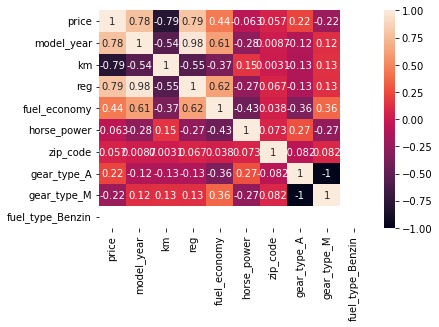

In [32]:
#Heatmap to show correlation between target and feautres
sns.heatmap(df.corr(), annot=True)
df.corr()

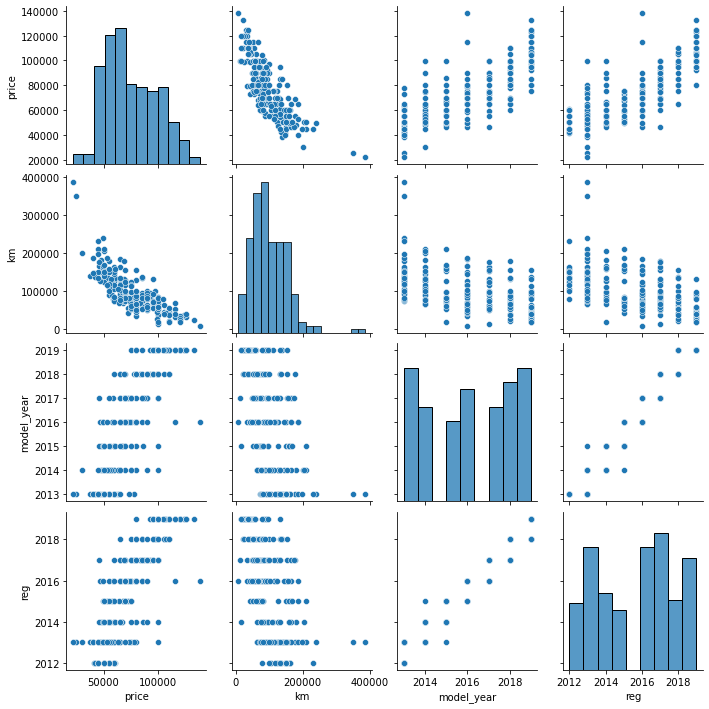

In [33]:
#Plots
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='km'>

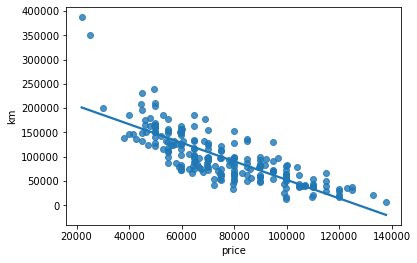

In [36]:
#regplot with price and model year
sns.regplot(x=df['price'], y=df['km'], ci=None)

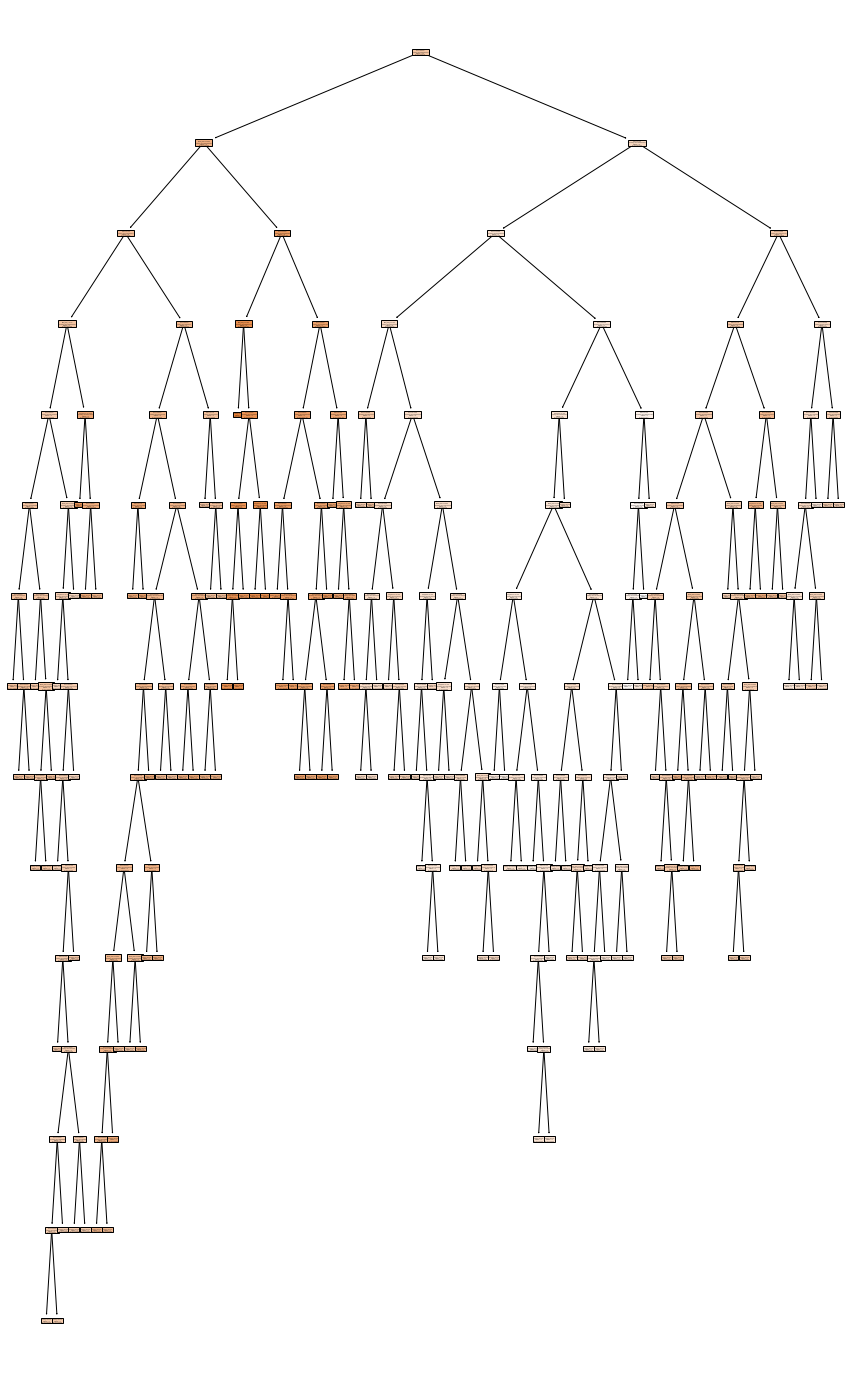

In [35]:
#map of the descision tree
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(dtr, feature_names=X.columns, filled=True)